#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df = pd.read_csv('datasets/heart/heart.csv')
# Sex: 0 for females and 1 for males
df["Sex"]=df["Sex"].replace("F",0)  
df["Sex"]=df["Sex"].replace("M",1)

# ChestPainType: 1 for ASY, 2 for NAP, 3 for ATA, 4 for TA
df["ChestPainType"]=df["ChestPainType"].replace("ASY",1)  
df["ChestPainType"]=df["ChestPainType"].replace("NAP",2) 
df["ChestPainType"]=df["ChestPainType"].replace("ATA",3) 
df["ChestPainType"]=df["ChestPainType"].replace("TA",4) 

# RestingECG: 1 for Normal, 2 for LVH, and 3 for ST
df["RestingECG"]=df["RestingECG"].replace("Normal",1) 
df["RestingECG"]=df["RestingECG"].replace("LVH",2) 
df["RestingECG"]=df["RestingECG"].replace("ST",3) 

# ExerciseAngina: 0 for N and 1 for Y
df["ExerciseAngina"]=df["ExerciseAngina"].replace("N",0)
df["ExerciseAngina"]=df["ExerciseAngina"].replace("Y",1)

# ST_Slope: 1 for Flat, 2 for Up, and 3 for Down
df["ST_Slope"]=df["ST_Slope"].replace("Flat",1)
df["ST_Slope"]=df["ST_Slope"].replace("Up",2)
df["ST_Slope"]=df["ST_Slope"].replace("Down",3)


In [3]:
df.head(25)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,3,130,283,0,3,98,0,0.0,2,0
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,3,130,237,0,1,170,0,0.0,2,0
7,54,1,3,110,208,0,1,142,0,0.0,2,0
8,37,1,1,140,207,0,1,130,1,1.5,1,1
9,48,0,3,120,284,0,1,120,0,0.0,2,0


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

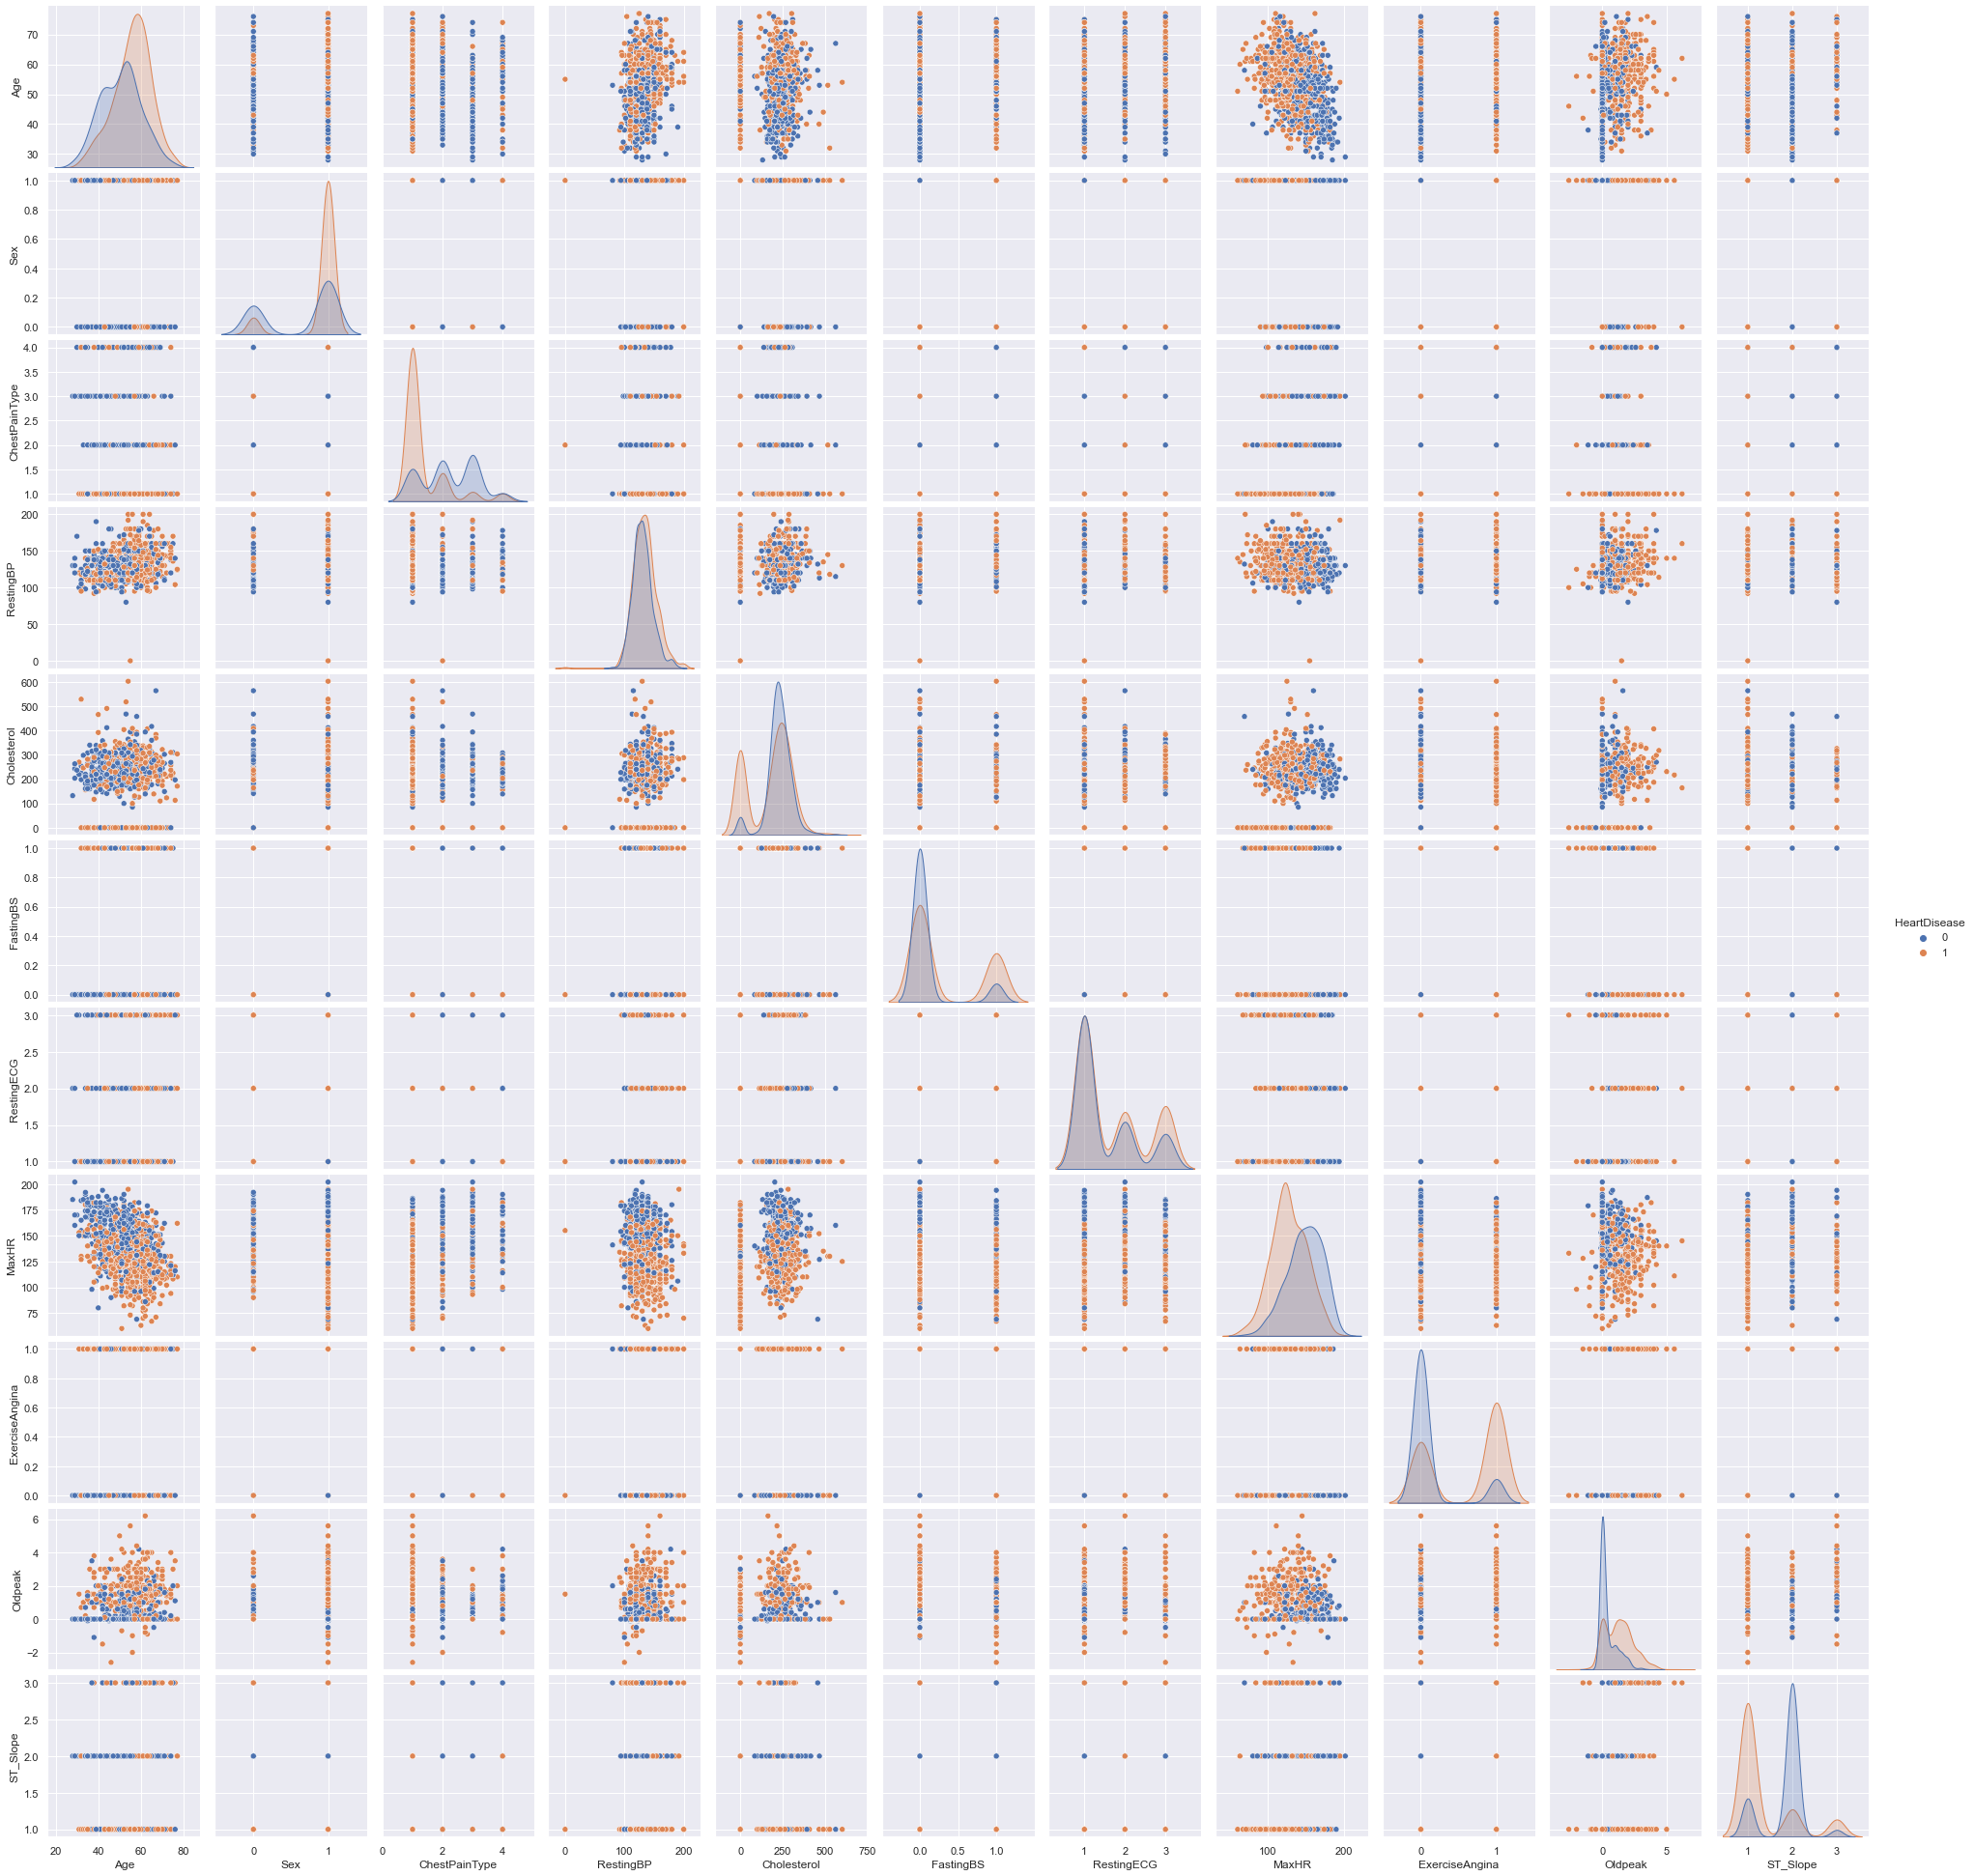

In [5]:
sns.pairplot(df, hue='HeartDisease')
plt.show()

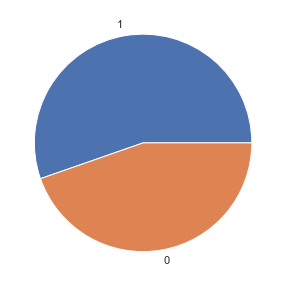

In [6]:
y =df['HeartDisease']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['HeartDisease'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,1.748366,0.931031,1.0,1.00,1.0,2.0,4.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,1.592593,0.793670,1.0,1.00,1.0,2.0,3.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,-1.083616e-16,1.000545,-2.706015,-0.690629,0.051881,0.688318,2.491558
Sex,918.0,-7.740117e-18,1.000545,-1.938163,0.515952,0.515952,0.515952,0.515952
ChestPainType,918.0,-1.935029e-17,1.000545,-0.804242,-0.804242,-0.804242,0.270422,2.419749
RestingBP,918.0,1.954380e-16,1.000545,-7.154995,-0.669935,-0.129513,0.410909,3.653439
Cholesterol,918.0,0.000000e+00,1.000545,-1.818435,-0.233704,0.221363,0.623835,3.697252
FastingBS,918.0,-3.096047e-17,1.000545,-0.551341,-0.551341,-0.551341,-0.551341,1.813758
RestingECG,918.0,7.740117e-17,1.000545,-0.747055,-0.747055,-0.747055,0.513601,1.774257
MaxHR,918.0,4.953675e-16,1.000545,-3.018469,-0.660578,0.046790,0.754157,2.561874
ExerciseAngina,918.0,-3.870058e-18,1.000545,-0.823556,-0.823556,-0.823556,1.214246,1.214246
Oldpeak,918.0,1.238419e-16,1.000545,-3.271482,-0.832432,-0.269575,0.574711,4.983762


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

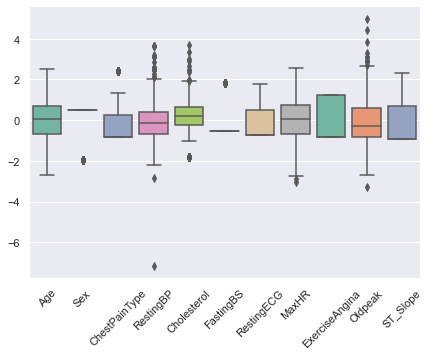

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

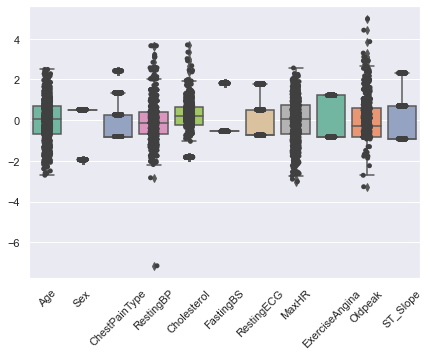

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

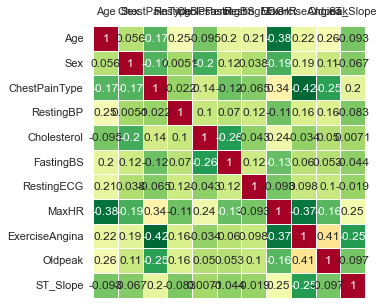

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.608018,-0.304577,-0.152832,0.505365,-1.108948,-1.036641,0.008242,-0.259692,0.033265,0.257656
1,1.056589,-1.296353,0.257256,-1.568993,-0.525924,0.426331,0.651495,-0.613947,-1.429829,-0.756373
2,1.135936,0.219207,0.536859,0.242029,1.030329,-1.607432,-1.285649,-0.271753,0.288396,1.624433
3,-0.873482,-1.291742,-1.312488,-1.302791,0.432846,1.285920,0.357396,-0.686256,-0.800443,0.716846
4,0.579043,0.211195,0.268185,-0.307057,-1.226817,-0.104625,-1.259349,-0.624182,0.292647,-0.132325
...,...,...,...,...,...,...,...,...,...,...
913,1.657369,0.013076,-0.836138,-0.383931,-0.423067,-0.865078,-0.236333,2.290363,-0.307363,0.828680
914,-1.919352,-0.149977,0.703396,0.185143,-1.354171,0.655643,1.654577,1.333870,0.262549,-1.741138
915,-1.605830,0.119194,-1.435974,-0.405731,-0.274029,0.183750,-0.484359,0.084261,-0.319844,0.008410
916,1.945115,-0.965922,0.974292,-1.489136,0.985835,-0.062903,0.382630,0.657378,-0.638182,-0.367525


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'10 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (23.8% expl.var)', ylabel='PC2 (12.4% expl.var)'>)

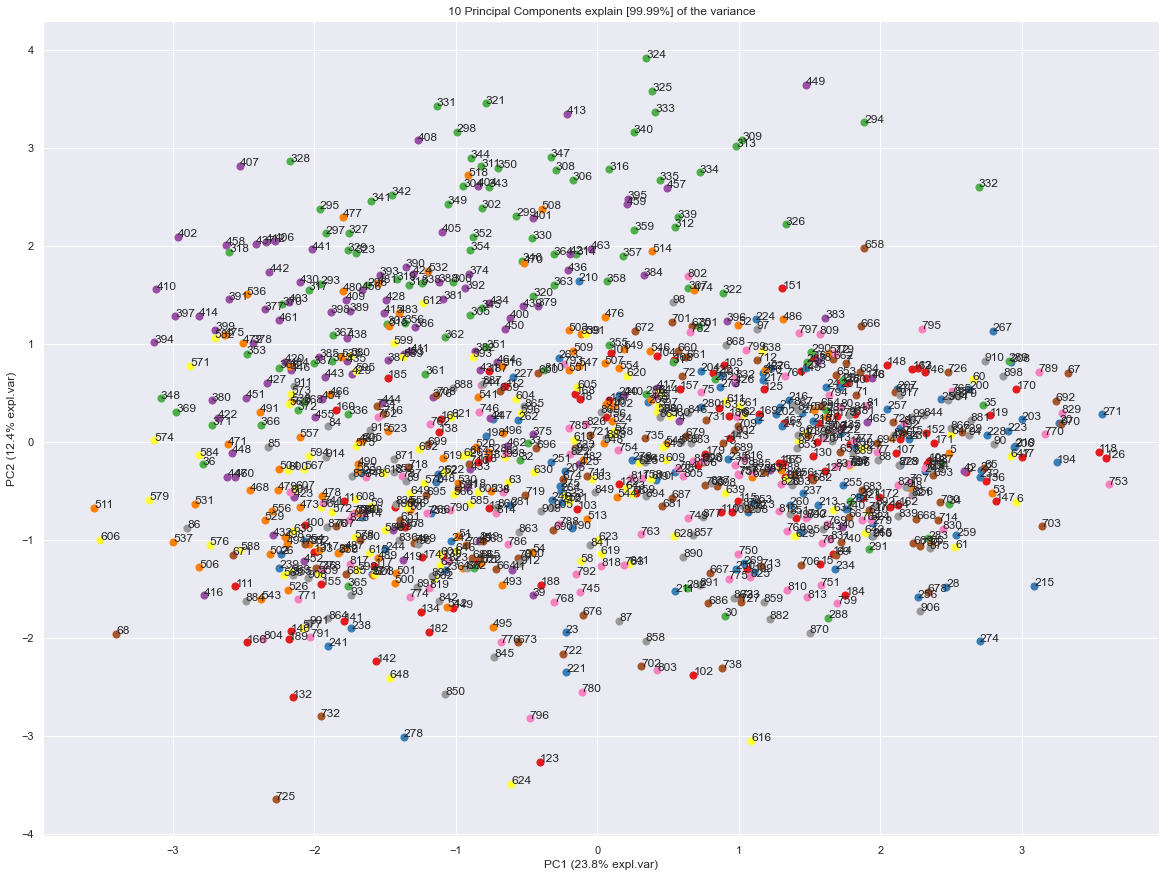

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

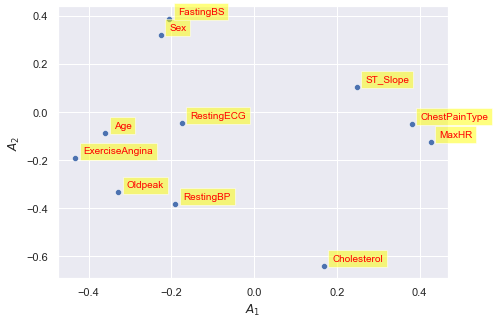

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

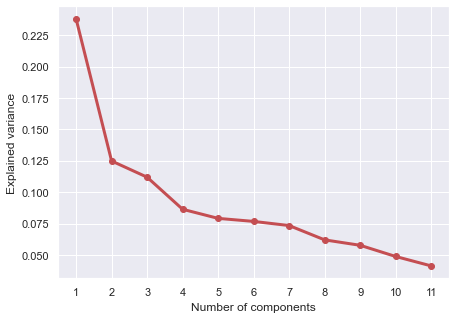

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

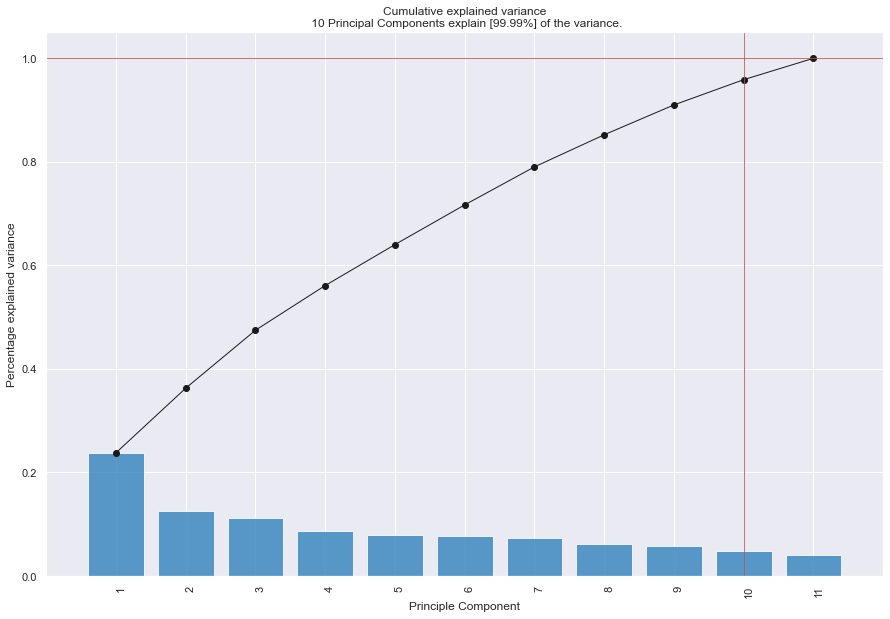

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();